In [62]:
import wave
import numpy as np
import matplotlib.pyplot as plt
import numba

In [75]:
# Function to read WAV file and return signal, sample rate, and time array
def read_wave(file_path):
    with wave.open(file_path, 'r') as wf:
        # Extract audio data
        n_frames = wf.getnframes()
        n_channels = wf.getnchannels()
        sample_width = wf.getsampwidth()
        sample_rate = wf.getframerate()

        

        # Read frames and convert to numpy array
        frames = wf.readframes(n_frames)
        signal = np.frombuffer(frames, dtype=np.int32)  # Assuming 32-bit WAV files
        signal = signal/np.max(np.abs(signal))

        print(sample_rate)
        

        # If stereo, take only one channel
        if n_channels > 1:
            signal = signal[::n_channels]

        # Create time array
        time = np.linspace(0, n_frames / sample_rate, num=len(signal))

        
        

    return signal, sample_rate, time





In [76]:
def peak_finder(signal, time):

    # Find peaks
    peaks = []
    peak_times = []
    for i in range(1, len(signal) - 1):
        if signal[i - 1] < signal[i] and signal[i] > signal[i + 1] and signal[i] > 0.5:
            peaks.append(signal[i])
            peak_times.append(time[i])

    return peak_times, peaks

@numba.njit(fastmath=True)
def peak_find_neigh(t_list, y_list, neigh=50):
    t_peak = []
    peaks = []
    for i in range(len(y_list) - neigh):
        if y_list[i] > y_list[i-1] and y_list[i] > y_list[i+1] and y_list[i] > 0.5:

            # check N neighbours each way
            index_check = []
            for j in range(1, neigh+1):
                if y_list[i] > y_list[i-j] and y_list[i] > y_list[i+j]:
                    index_check.append(True)
                else:
                    index_check.append(False)

            if sum(index_check) == neigh:
                peaks.append(y_list[i])
                t_peak.append(t_list[i])

    return np.array(t_peak), np.array(peaks),

44100
Mean frequency: 13.821938746529238


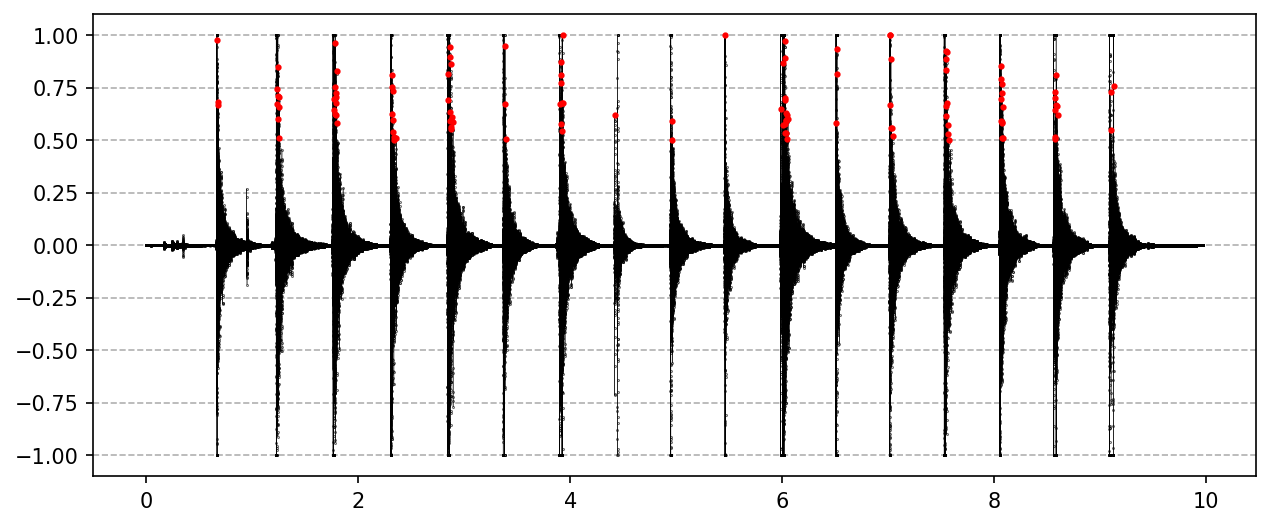

In [77]:
signal, sample_rate, time = read_wave('trial.wav')

peak_times, peaks = peak_find_neigh(time, signal)
freq_mean = 1/np.mean(np.diff(peak_times))
print('Mean frequency:', freq_mean)



# Plot signal
plt.figure(figsize=(10, 4), dpi = 150)
plt.plot(time, signal, color='black', ls='-', marker='.', linewidth = 0.2, markersize=0.5)
plt.plot(peak_times, peaks, color='red', ls='', marker='o', markersize=2)


# horizontal gridlines
plt.grid(axis='y', linestyle='--')

